## ASSIGNMENT TWO

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Fashion MNIST dataset downloaded successfully.")
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

2025-03-29 12:49:40.403998: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 12:49:40.932874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743245381.139934    6293 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743245381.209873    6293 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743245381.687958    6293 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Fashion MNIST dataset downloaded successfully.
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


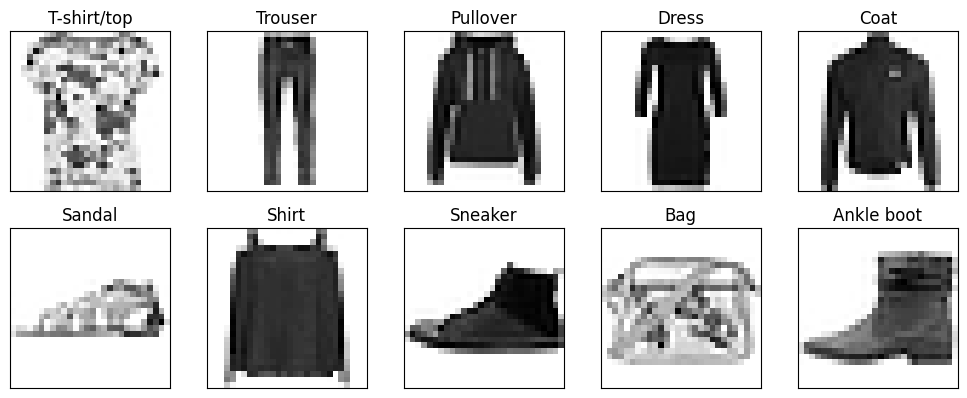

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure for the panel of plots
plt.figure(figsize=(10, 10))

# Loop through each class and plot one random example
for i in range(10):
    # Find all indices of the current class
    class_indices = np.where(y_train == i)[0]
    
    # Select a random index for the current class
    random_index = np.random.choice(class_indices)
    
    # Add a subplot for the current class
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Display the image and set the title
    plt.imshow(x_train[random_index], cmap=plt.cm.binary)
    plt.title(class_names[i])

# Show the panel of plots
plt.tight_layout()
plt.show()

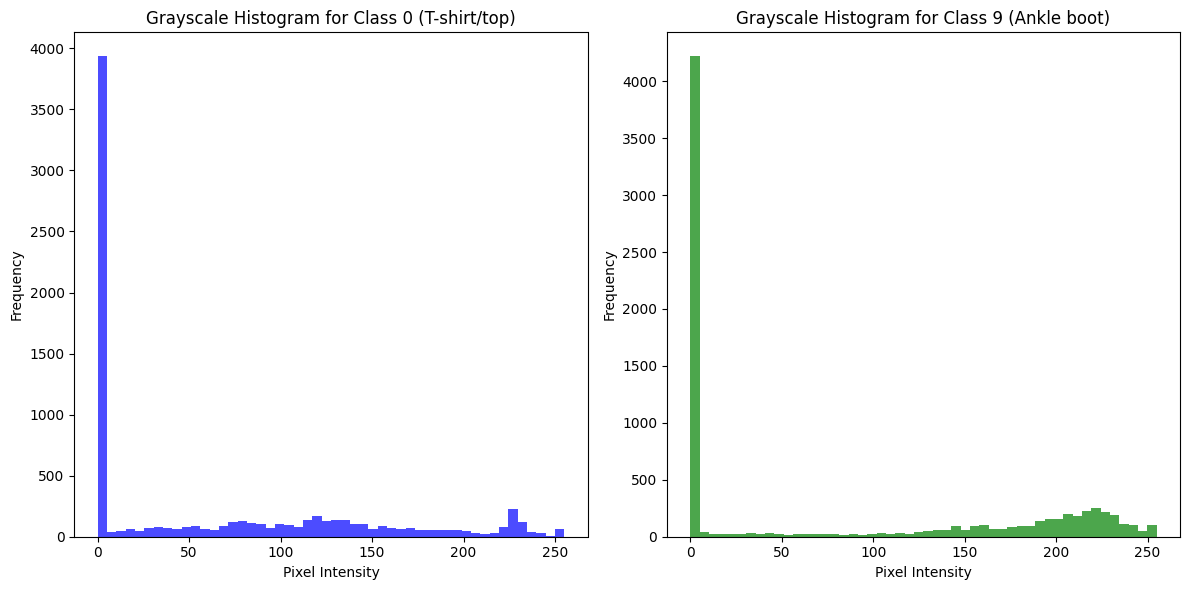

In [5]:
# Select two classes
class_1 = 0  # T-shirt/top
class_2 = 9  # Ankle boot

# Initialize lists to store grayscale values for each class
grayscale_values_class_1 = []
grayscale_values_class_2 = []

# Select 10 random images for each class
for _ in range(10):
    # Randomly select an image for class_1
    random_index_class_1 = np.random.choice(np.where(y_train == class_1)[0])
    grayscale_values_class_1.extend(x_train[random_index_class_1].flatten())
    
    # Randomly select an image for class_2
    random_index_class_2 = np.random.choice(np.where(y_train == class_2)[0])
    grayscale_values_class_2.extend(x_train[random_index_class_2].flatten())

# Create a panel of 2 histograms
plt.figure(figsize=(12, 6))

# Histogram for class_1
plt.subplot(1, 2, 1)
plt.hist(grayscale_values_class_1, bins=50, color='blue', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_1} ({class_names[class_1]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for class_2
plt.subplot(1, 2, 2)
plt.hist(grayscale_values_class_2, bins=50, color='green', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_2} ({class_names[class_2]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

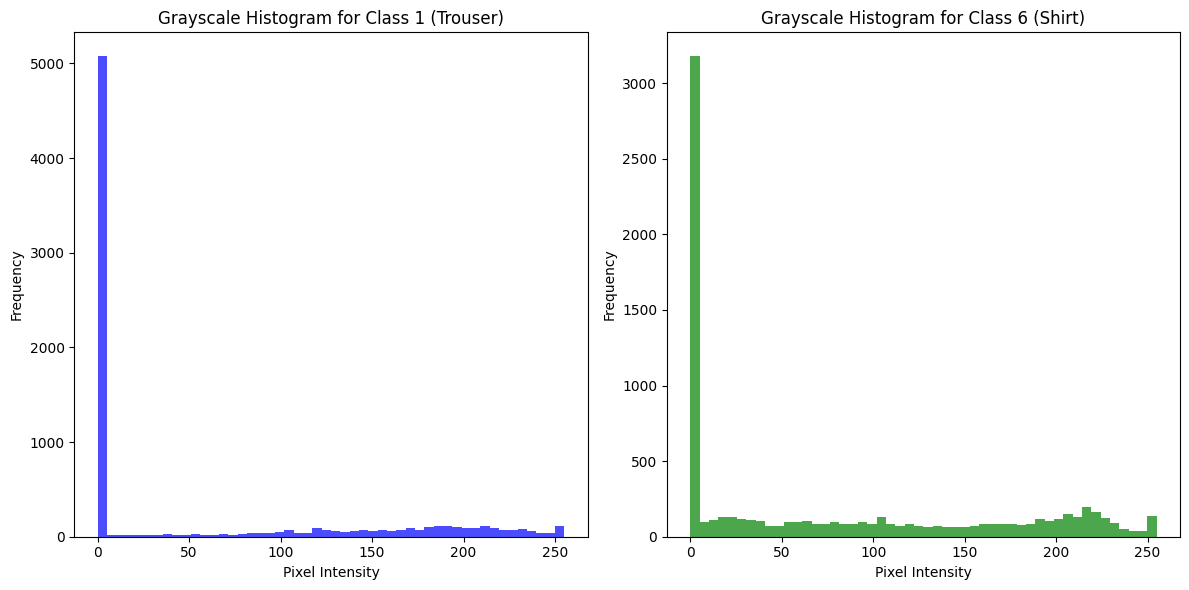

In [6]:
# Select two classes
class_1 = 1  # T-shirt/top
class_2 = 6  # Ankle boot

# Initialize lists to store grayscale values for each class
grayscale_values_class_1 = []
grayscale_values_class_2 = []

# Select 10 random images for each class
for _ in range(10):
    # Randomly select an image for class_1
    random_index_class_1 = np.random.choice(np.where(y_train == class_1)[0])
    grayscale_values_class_1.extend(x_train[random_index_class_1].flatten())
    
    # Randomly select an image for class_2
    random_index_class_2 = np.random.choice(np.where(y_train == class_2)[0])
    grayscale_values_class_2.extend(x_train[random_index_class_2].flatten())

# Create a panel of 2 histograms
plt.figure(figsize=(12, 6))

# Histogram for class_1
plt.subplot(1, 2, 1)
plt.hist(grayscale_values_class_1, bins=50, color='blue', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_1} ({class_names[class_1]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for class_2
plt.subplot(1, 2, 2)
plt.hist(grayscale_values_class_2, bins=50, color='green', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_2} ({class_names[class_2]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

In [7]:
# Flatten the input data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Normalize the pixel values
x_train_normalized = x_train_flattened / 255.0
x_test_normalized = x_test_flattened / 255.0

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_normalized.shape[1],)),  # Hidden layer with 128 neurons
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',  # Optimization algorithm
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # Metric to monitor

# Train the model
history = model.fit(x_train_normalized, y_train, epochs=10, batch_size=32, validation_data=(x_test_normalized, y_test))

# Display the model summary
model.summary()

/home/kip/projects/ADL/ADLEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1743248010.662628    6293 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7717 - loss: 0.6428 - val_accuracy: 0.8516 - val_loss: 0.4143
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8635 - loss: 0.3738 - val_accuracy: 0.8583 - val_loss: 0.3909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8731 - loss: 0.3403 - val_accuracy: 0.8669 - val_loss: 0.3730
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8856 - loss: 0.3041 - val_accuracy: 0.8668 - val_loss: 0.3700
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8909 - loss: 0.2903 - val_accuracy: 0.8692 - val_loss: 0.3546
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8972 - loss: 0.2750 - val_accuracy: 0.8699 - val_loss: 0.3603
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9011 - loss: 0.2609 - val_accuracy: 0.8768 - val_loss: 0.3370
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9039 - los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

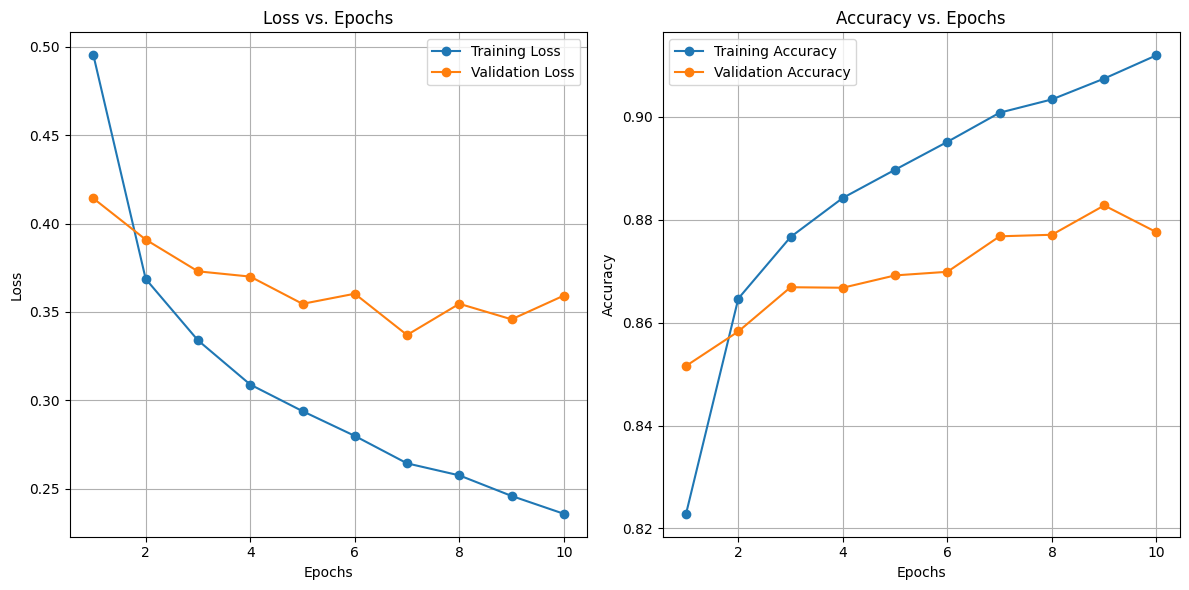

In [ ]:
# Extract training and validation metrics from the history object
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plot loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot accuracy values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
    
# Show the plots
plt.tight_layout()
plt.show()